In [1]:
# importing libraries,reading csv into a dataframe
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot
data = pd.read_csv("boston.csv")

### EDA

In [2]:
from pandas import set_option
set_option('precision', 2)
data.head(2)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,6.32e-03,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,2,2.73e-02,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242,17.8,396.9,9.14,21.6


In [3]:
data.shape

(506, 15)

In [4]:
data=data.drop('Unnamed: 0',1)

In [5]:
data.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [6]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,5.06e+02,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61e+00,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60e+00,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,6.32e-03,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,8.20e-02,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,2.57e-01,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68e+00,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,8.90e+01,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


### Correlation of variables to prediction variable 'medv'

In [7]:
set_option('precision', 1)
corr = data.corr()
corr.iloc[:,-1:]

,medv
crim,-0.4
zn,0.4
indus,-0.5
chas,0.2
nox,-0.4
rm,0.7
age,-0.4
dis,0.2
rad,-0.4
tax,-0.5


### Data with relevant features

In [8]:
prices = data['medv']
data = data.drop(['crim','zn','chas','nox','dis','rad','black'], axis = 1)
features = data.drop('medv', axis = 1)
data.head(2)

,indus,rm,age,tax,ptratio,lstat,medv
0,2.3,6.6,65.2,296,15.3,5.0,24.0
1,7.1,6.4,78.9,242,17.8,9.1,21.6


### Correlation graph of the prepared dataset

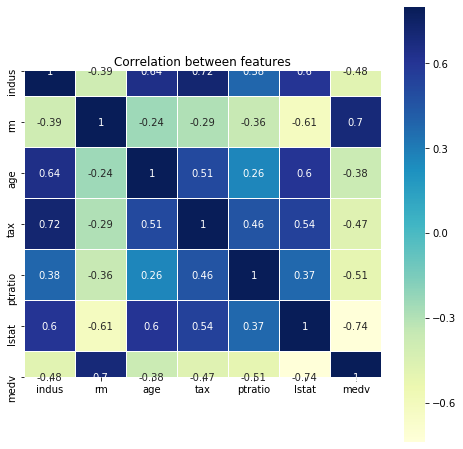

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
corr=data.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

### Data visualizations with histograms and boxplots

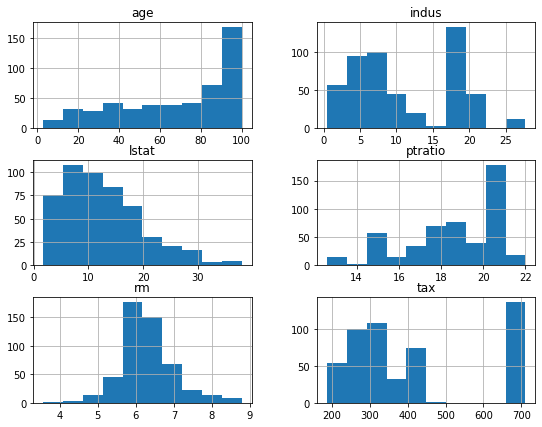

In [10]:
hist = features.hist(bins=10,figsize=(9,7));
hist;

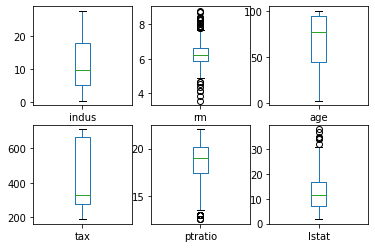

In [11]:
# box and whisker plots
features.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
pyplot.show()

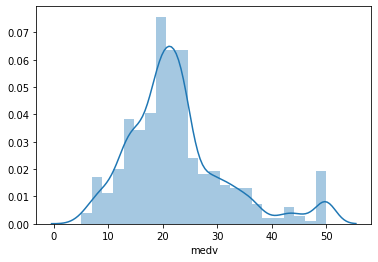

In [12]:
# Visualizations of the predective variable medv
sns.distplot(data['medv']);

### Loading libraries for modelling

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

### Prepare Data

In [14]:
# Split-out validation dataset
X = data.drop('medv', axis = 1)
Y = data['medv']
X = np.array(X)
Y = np.array(Y)
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, 
                                                                random_state=seed)

### Scaling the train set data

In [15]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

### Evaluation  Algorithm

In [16]:
# Test options and evaluation metric using Root Mean Square error method
num_folds = 10
RMS = 'neg_mean_squared_error'

In [17]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

### Evaluate each model in turn

In [18]:
results= []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=RMS)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -25.089601 (8.867038)
LASSO: -26.614655 (8.902939)
EN: -29.060705 (10.763899)
KNN: -15.224860 (8.903314)
CART: -33.589253 (11.150356)
SVR: -24.264259 (13.731167)


C:\Users\MGrover\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\MGrover\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\MGrover\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C

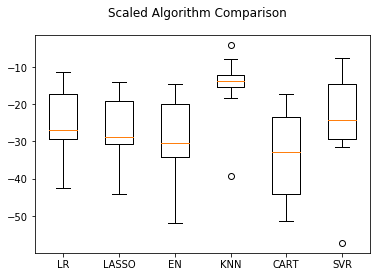

In [19]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### KNN was the best predictive model: lets do KNN Algorithm tuning

In [20]:
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=RMS, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
data.shape

Best: -15.265260 using {'n_neighbors': 5}
-17.129876 (10.098728) with: {'n_neighbors': 1}
-15.832731 (8.911047) with: {'n_neighbors': 3}
-15.265260 (8.950902) with: {'n_neighbors': 5}
-16.350941 (9.230521) with: {'n_neighbors': 7}
-17.436495 (8.960336) with: {'n_neighbors': 9}
-18.273144 (8.802882) with: {'n_neighbors': 11}
-19.282543 (9.598825) with: {'n_neighbors': 13}
-20.210118 (10.701611) with: {'n_neighbors': 15}
-20.987193 (11.283245) with: {'n_neighbors': 17}
-21.452058 (11.403366) with: {'n_neighbors': 19}
-21.908483 (11.590929) with: {'n_neighbors': 21}


C:\Users\MGrover\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(506, 7)

### Best KNN : -15.265260 using {'n_neighbors': 5}

### Evaluating Ensembles models with KNN

In [21]:
ensembles = []
ensembles.append(('AB', AdaBoostRegressor()))
ensembles.append(('RF', RandomForestRegressor()))
ensembles.append(('GB', GradientBoostingRegressor()))
results = []
names = []
for name, model in ensembles:
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=RMS)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
data.shape

AB: -17.136163 (7.570383)


C:\Users\MGrover\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MGrover\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MGrover\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\MGrover\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 10

RF: -13.662462 (6.237373)
GB: -12.229444 (6.320187)


(506, 7)

### When we compare, GBM has better accuracy than KNN
### So Our chosen model is GBM and letz tune

In [22]:
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=RMS, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -12.223723 using {'n_estimators': 100}
-12.628500 (6.187861) with: {'n_estimators': 50}
-12.223723 (6.447183) with: {'n_estimators': 100}
-12.295342 (6.743740) with: {'n_estimators': 150}
-12.405986 (6.786296) with: {'n_estimators': 200}
-12.387440 (6.600146) with: {'n_estimators': 250}
-12.531713 (6.646707) with: {'n_estimators': 300}
-12.577056 (6.551046) with: {'n_estimators': 350}
-12.636431 (6.511391) with: {'n_estimators': 400}


C:\Users\MGrover\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Make predictions on validation dataset

In [23]:
# Initialize and fit the model.
model = GradientBoostingRegressor(random_state=seed, n_estimators=100)
model.fit(X_train, Y_train)

# transform the validation dataset
scaler2 = StandardScaler().fit(X_validation)
X_validation = scaler2.transform(X_validation)

predictions = model.predict(X_validation)
print(mean_squared_error(Y_validation, predictions))

23.03983267445334


In [24]:
predictions=predictions.astype(float)
data_predict = pd.DataFrame({"Org House Price": Y_validation, "Pred House Price": predictions})

# data_predict.to_csv("PredictedPrice.csv", index=False)

In [25]:
data_predict.describe()

,Org House Price,Pred House Price
count,102.0,102.0
mean,22.6,22.5
std,9.0,8.7
min,6.3,6.2
25%,17.3,16.3
50%,21.8,21.7
75%,24.8,25.8
max,50.0,48.1
